In [1]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np

import os

In [2]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [02:11<00:00, 18.6MB/s]
100% 2.70G/2.70G [02:11<00:00, 22.0MB/s]


In [3]:
image_size = 224
target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

batch_size = 32
epochs = 25

In [4]:
base_dir = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = os.path.join(base_dir,"train")
test_dir = os.path.join(base_dir,"valid")

In [5]:
!unzip '/content/new-plant-diseases-dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [6]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0,
                                                             shear_range = 0.2,
                                                             zoom_range = 0.2,
                                                             width_shift_range = 0.2,
                                                             height_shift_range = 0.2,
                                                             fill_mode="nearest")

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0)

In [7]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (image_size, image_size),
                                               batch_size = batch_size,
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (image_size, image_size),
                                             batch_size = batch_size,
                                             class_mode = "categorical")

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [8]:
categories = list(train_data.class_indices.keys())
print(train_data.class_indices)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [9]:
import json
with open('class_indices.json','w') as f:
  json.dump(train_data.class_indices, f)

from IPython.display import FileLink
FileLink(r'class_indices.json')

/content/class_indices.json

In [10]:
base_model = tf.keras.applications.MobileNet(weights = "imagenet",
                                             include_top = False,
                                             input_shape = input_shape)

base_model.trainable = False

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [11]:
inputs = keras.Input(shape = input_shape)

x = base_model(inputs, training = False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(len(categories),
                          activation="softmax")(x)

model = keras.Model(inputs = inputs,
                    outputs = x,
                    name="LeafDisease_MobileNet")

In [12]:
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer = optimizer,
              loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True),
              metrics=[keras.metrics.CategoricalAccuracy(),
                       'accuracy'])

In [13]:
history = model.fit(train_data,
                    validation_data=test_data,
                    epochs=epochs,
                    steps_per_epoch=150,
                    validation_steps=100)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:567: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


150/150 ━━━━━━━━━━━━━━━━━━━━ 77s 433ms/step - accuracy: 0.2906 - categorical_accuracy: 0.2906 - loss: 2.8179 - val_accuracy: 0.8028 - val_categorical_accuracy: 0.8028 - val_loss: 0.7933
Epoch 2/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 63s 422ms/step - accuracy: 0.7580 - categorical_accuracy: 0.7580 - loss: 0.8655 - val_accuracy: 0.8625 - val_categorical_accuracy: 0.8625 - val_loss: 0.5114
Epoch 3/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 65s 434ms/step - accuracy: 0.8176 - categorical_accuracy: 0.8176 - loss: 0.6154 - val_accuracy: 0.8988 - val_categorical_accuracy: 0.8988 - val_loss: 0.3780
Epoch 4/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 65s 434ms/step - accuracy: 0.8666 - categorical_accuracy: 0.8666 - loss: 0.4705 - val_accuracy: 0.8969 - val_categorical_accuracy: 0.8969 - val_loss: 0.3262
Epoch 5/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 65s 438ms/step - accuracy: 0.8770 - categorical_accuracy: 0.8770 - loss: 0.4080 - val_accuracy: 0.9109 - val_categorical_accuracy: 0.9109 - val_loss: 0.3061
Epoch 6/25
150/150 ━━━━━━━

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


150/150 ━━━━━━━━━━━━━━━━━━━━ 74s 495ms/step - accuracy: 0.8936 - categorical_accuracy: 0.8936 - loss: 0.3391 - val_accuracy: 0.9166 - val_categorical_accuracy: 0.9166 - val_loss: 0.2661
Epoch 8/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 73s 487ms/step - accuracy: 0.9118 - categorical_accuracy: 0.9118 - loss: 0.3148 - val_accuracy: 0.9331 - val_categorical_accuracy: 0.9331 - val_loss: 0.2297
Epoch 9/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 65s 436ms/step - accuracy: 0.9133 - categorical_accuracy: 0.9133 - loss: 0.2829 - val_accuracy: 0.9219 - val_categorical_accuracy: 0.9219 - val_loss: 0.2400
Epoch 10/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 64s 432ms/step - accuracy: 0.9140 - categorical_accuracy: 0.9140 - loss: 0.2856 - val_accuracy: 0.9325 - val_categorical_accuracy: 0.9325 - val_loss: 0.2299
Epoch 11/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 64s 431ms/step - accuracy: 0.9181 - categorical_accuracy: 0.9181 - loss: 0.2597 - val_accuracy: 0.9328 - val_categorical_accuracy: 0.9328 - val_loss: 0.2158
Epoch 12/25
150/150 ━━━━

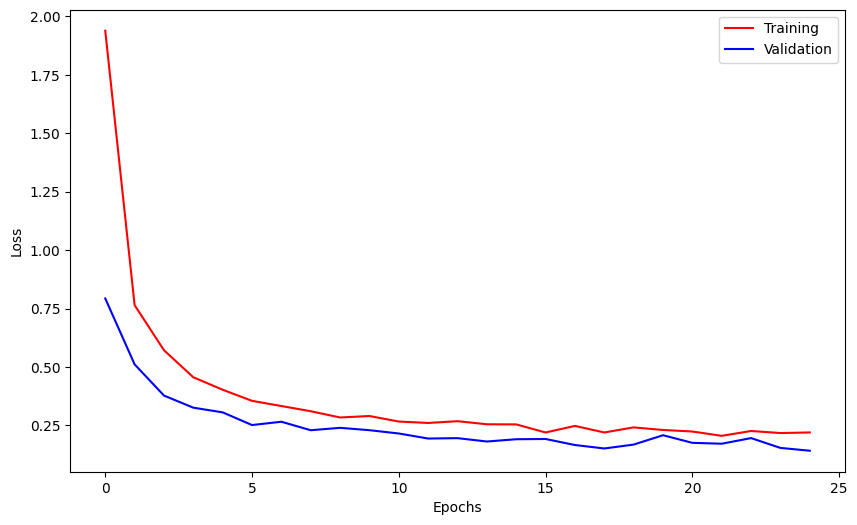

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

fig = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,val_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

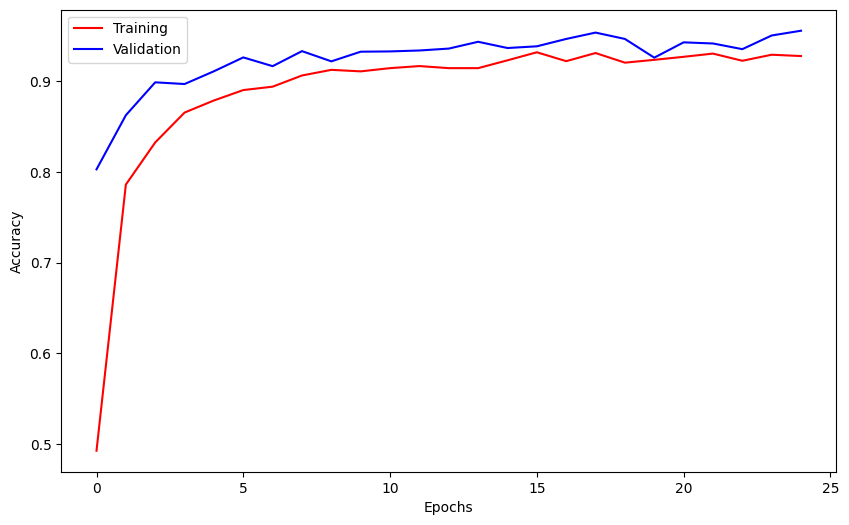

In [15]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

epochs = range(len(acc))

fig = plt.figure(figsize=(10,6))
plt.plot(epochs,acc,c="red",label="Training")
plt.plot(epochs,val_acc,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [17]:
# prompt: save the model as h5 extension

model.save('plant_disease.h5')


In [18]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpn1eci15n'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_86')
Output Type:
  TensorSpec(shape=(None, 38), dtype=tf.float32, name=None)
Captures:
  136457652225648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136457666093376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136457666091264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136457666090208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136457666091088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136457666100416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136457666282944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136457666287168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136457666286464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136457666287344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1364576662

In [50]:
# prompt: use the same function as below but add a section which gives suggestions depending on the diseases also

from google.colab import files
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import json
from IPython.display import FileLink
from PIL import Image
import io

def predict_image(image_path):
  """
  Predicts the disease of a plant image.

  Args:
    image_path: Path to the image file.

  Returns:
    A tuple containing the predicted disease and a list of suggestions.
  """
  # Load the image
  image = Image.open(image_path)
  image = image.resize((224, 224))
  image = np.array(image)
  image = image / 255.0
  image = np.expand_dims(image, axis=0)

  # Load the model
  model = tf.keras.models.load_model('plant_disease.h5')

  # Make the prediction
  prediction = model.predict(image)
  predicted_class = np.argmax(prediction)

  # Load the class indices
  with open('class_indices.json', 'r') as f:
    class_indices = json.load(f)

  # Get the predicted disease
  for key, value in class_indices.items():
    if value == predicted_class:
      predicted_disease = key
      break

  # Display the image
  plt.imshow(image[0])
  plt.title(f"Predicted Disease: {predicted_disease}")
  plt.axis('off')
  plt.show()
  # Provide suggestions based on the disease
  suggestions = []
  if predicted_disease == "Tomato___Bacterial_spot":
    suggestions = [
        "Use copper-based fungicides.",
        "Remove infected leaves and fruits.",
        "Maintain good sanitation.",
    ]
  elif predicted_disease == "Tomato___Early_blight":
    suggestions = [
        "Use fungicides with active ingredients like chlorothalonil or mancozeb.",
        "Remove infected leaves.",
        "Provide good air circulation."
    ]
  elif predicted_disease == "Tomato___Late_blight":
    suggestions = [
        "Use fungicides with active ingredients like chlorothalonil or mancozeb.",
        "Remove infected leaves and fruits.",
        "Maintain good sanitation."
    ]
  elif predicted_disease == "Tomato___Leaf_Mold":
    suggestions = [
        "Use fungicides with active ingredients like myclobutanil or azoxystrobin.",
        "Remove infected leaves.",
        "Provide good air circulation."
    ]
  elif predicted_disease == "Tomato___Septoria_leaf_spot":
    suggestions = [
        "Use fungicides with active ingredients like chlorothalonil or mancozeb.",
        "Remove infected leaves.",
        "Provide good air circulation."
    ]
  elif predicted_disease == "Tomato___Spider_mites Two-spotted_spider_mite":
    suggestions = [
        "Use miticides like pyridaben or acetamiprid.",
        "Remove infected leaves.",
        "Maintain good sanitation."
    ]
  elif predicted_disease == "Tomato___Target_Spot":
    suggestions = [
        "Use fungicides with active ingredients like chlorothalonil or mancozeb.",
        "Remove infected leaves.",
        "Provide good air circulation."
    ]
  elif predicted_disease == "Tomato___Tomato_Yellow_Leaf_Curl_Virus":
    suggestions = [
        "Remove infected plants.",
        "Use insecticides to control whiteflies.",
        "Use resistant varieties."
    ]
  elif predicted_disease == "Tomato___Tomato_mosaic_virus":
    suggestions = [
        "Remove infected plants.",
        "Use insecticides to control aphids.",
        "Use resistant varieties."
    ]
  elif predicted_disease == "Potato___Early_blight":
    suggestions = [
        "Use fungicides with active ingredients like chlorothalonil or mancozeb.",
        "Remove infected leaves.",
        "Provide good air circulation."
    ]
  elif predicted_disease == "Potato___Late_blight":
    suggestions = [
        "Use fungicides with active ingredients like chlorothalonil or mancozeb.",
        "Remove infected leaves and tubers.",
        "Maintain good sanitation."
    ]
  elif predicted_disease == "Potato___healthy":
    suggestions = [
        "Continue to monitor your plants for any signs of disease."
    ]
  elif predicted_disease == "Pepper___Bacterial_spot":
    suggestions = [
        "Use copper-based fungicides.",
        "Remove infected leaves and fruits.",
        "Maintain good sanitation."
    ]
  elif predicted_disease == "Pepper___healthy":
    suggestions = [
        "Continue to monitor your plants for any signs of disease."
    ]

  return predicted_disease, suggestions



Enter the path of the image: /content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Tomato___Leaf_Mold/0160c3b5-d89e-40e5-a313-49ae1524040a___Crnl_L.Mold 6823.JPG


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


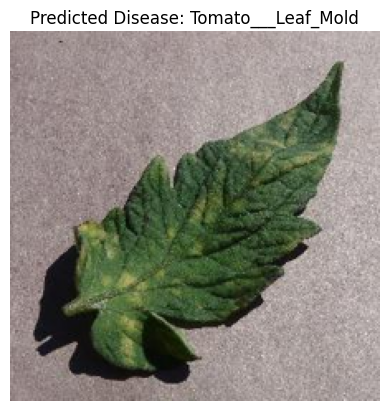

('Tomato___Leaf_Mold',
 ['Use fungicides with active ingredients like myclobutanil or azoxystrobin.',
  'Remove infected leaves.',
  'Provide good air circulation.'])

In [53]:
path = input("Enter the path of the image: ")
predict_image(path)